### Import Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [5]:
df = pd.read_csv('data/processed/2_missing_values_handled.csv')

In [6]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
numerical_cols.remove('Churn')
target = 'Churn'

### Analyzing Numerical Features

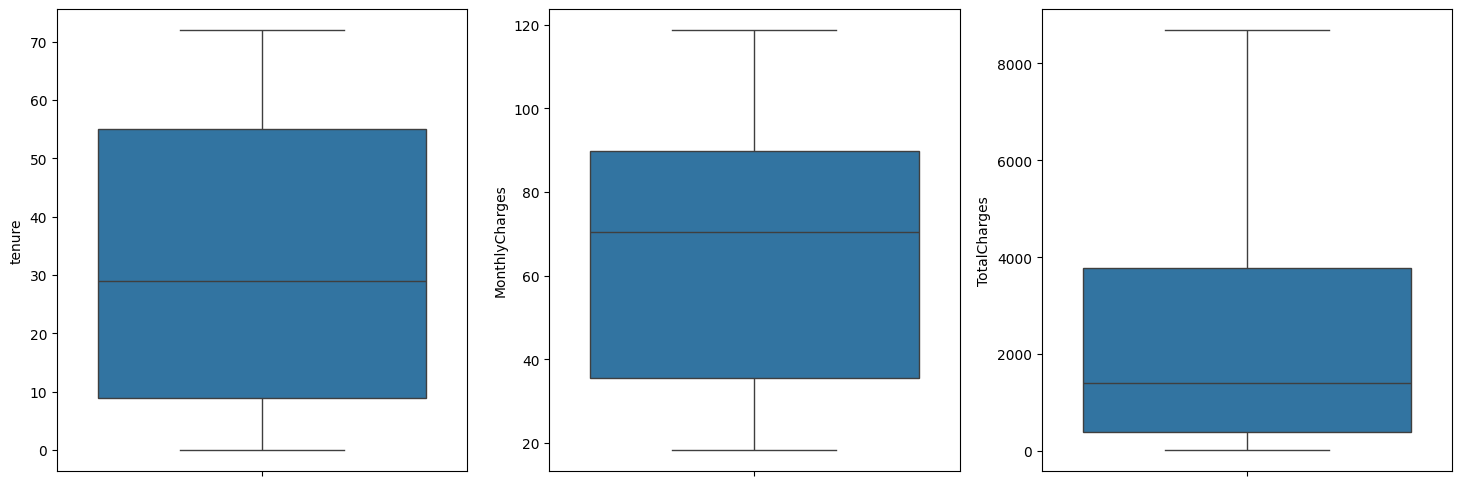

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.boxplot(data=df['tenure'], ax=axes[0])
sns.boxplot(data=df['MonthlyCharges'], ax=axes[1])
sns.boxplot(data=df['TotalCharges'], ax=axes[2])


plt.show()

### Outlier Detection using IQR

In [8]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lowerbound = Q1 - 1.5*IQR
    upperbound = Q3 + 1.5*IQR

    return (data < lowerbound) | (data > upperbound)

for col in numerical_cols:
    n_outliers = find_anomaly(df[col])
    print(f'Number of outlier in {col}: {n_outliers.sum()}')

Number of outlier in SeniorCitizen: 1142
Number of outlier in tenure: 0
Number of outlier in MonthlyCharges: 0
Number of outlier in TotalCharges: 0


### Outlier Detection using Z-Score

In [9]:
def find_anomaly(data):
    mean = data.mean()
    std = data.std()
    upperbound = mean + 3*std
    lowerbound = mean - 3*std

    return (data < lowerbound) | (data > upperbound)

for col in numerical_cols:
    n_outliers = find_anomaly(df[col])
    print(f'Number of outlier in {col}: {n_outliers.sum()}')

Number of outlier in SeniorCitizen: 0
Number of outlier in tenure: 0
Number of outlier in MonthlyCharges: 0
Number of outlier in TotalCharges: 0


### Analyzing Categorical Features

#### Frequency Analysis

In [10]:
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

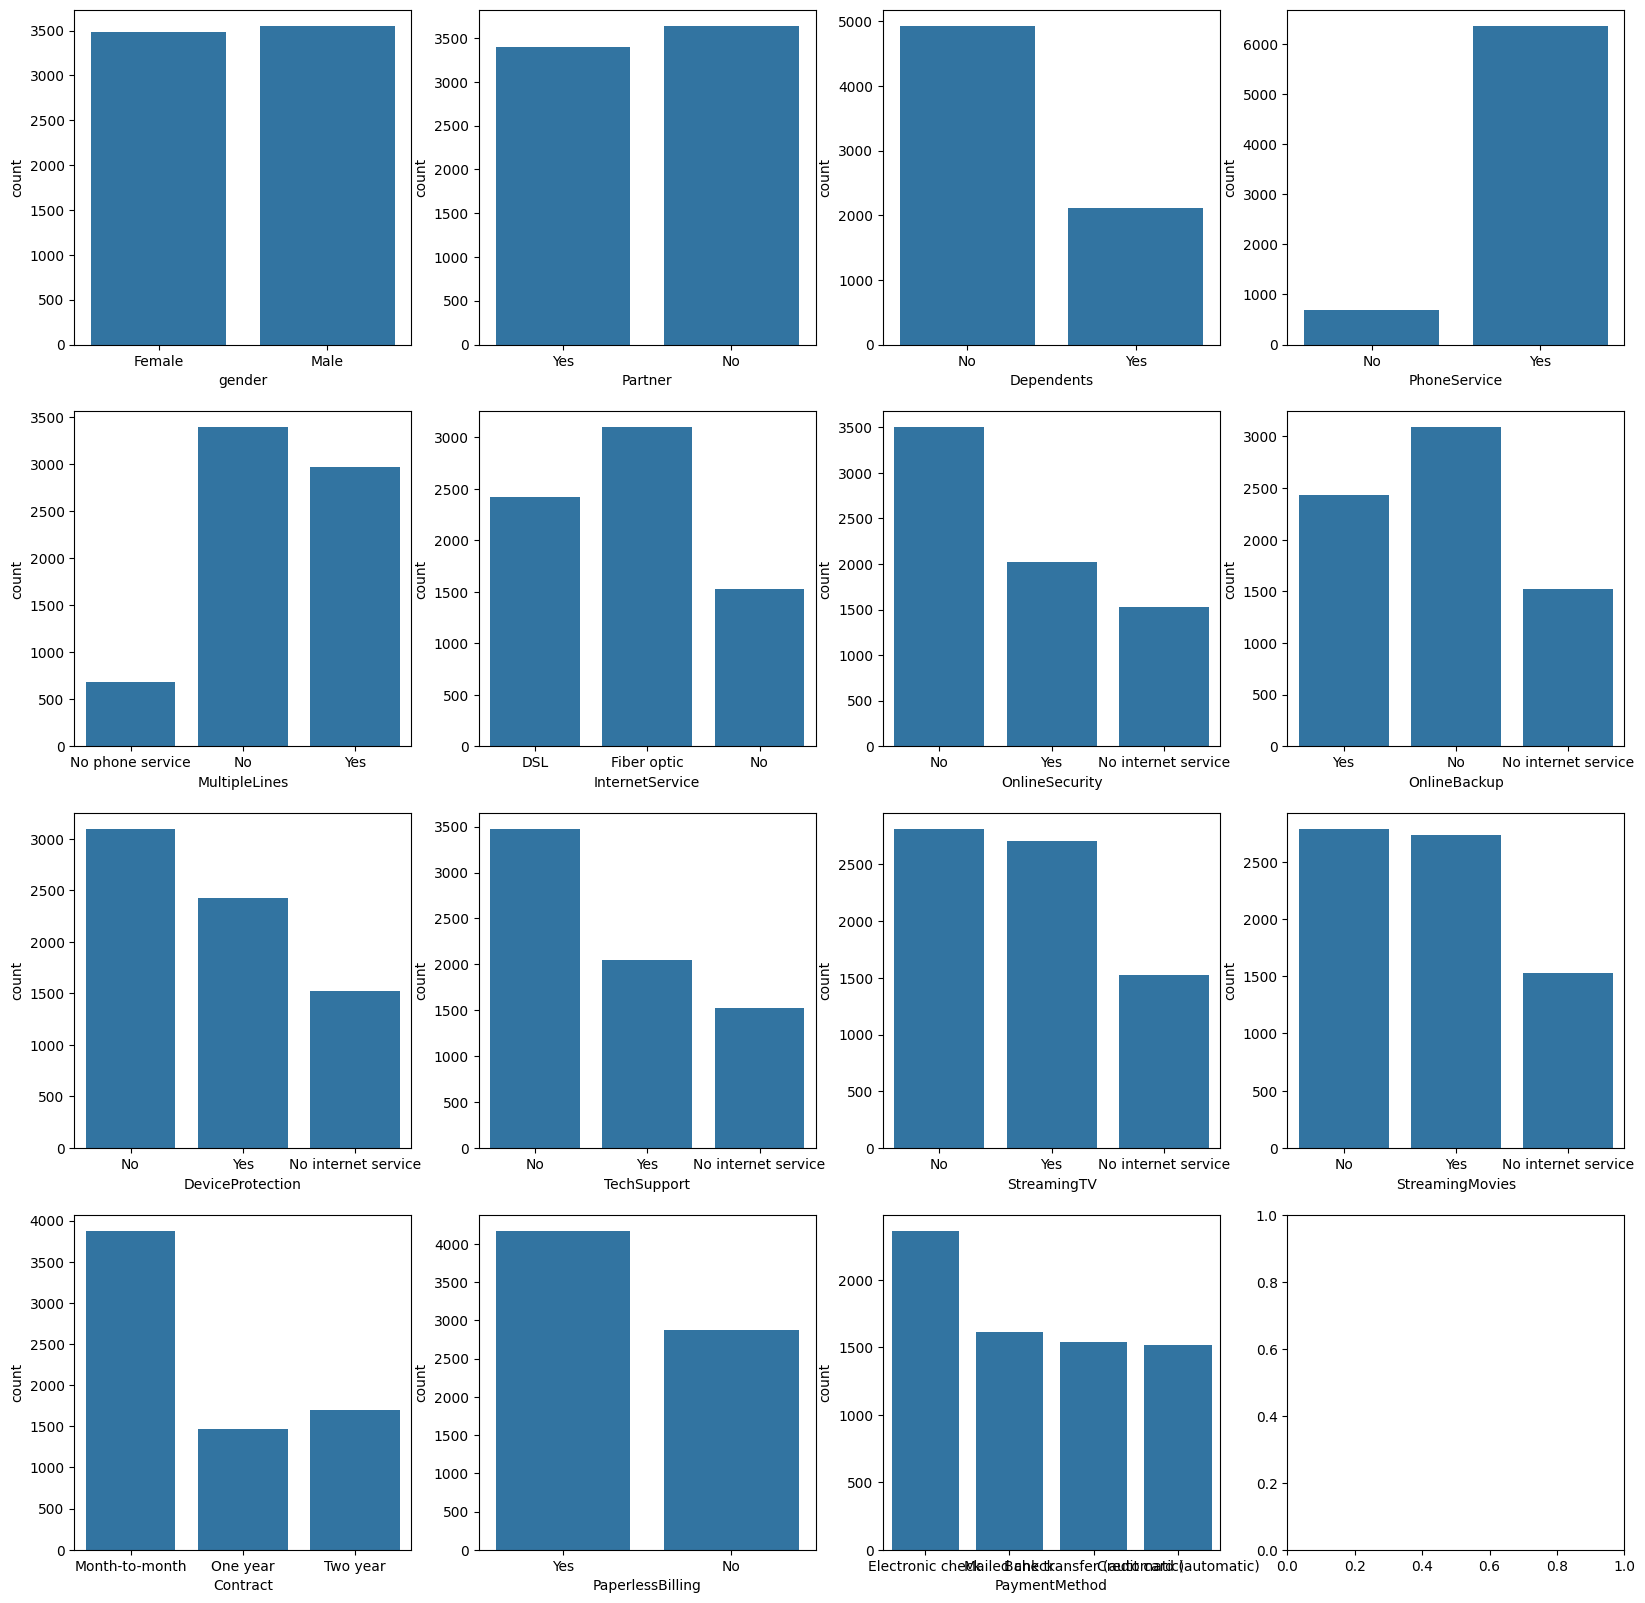

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for col in categorical_cols:
    sns.countplot(data=df, x=col, ax=axes[categorical_cols.index(col)//4, categorical_cols.index(col)%4])

#### Relationship with Churn

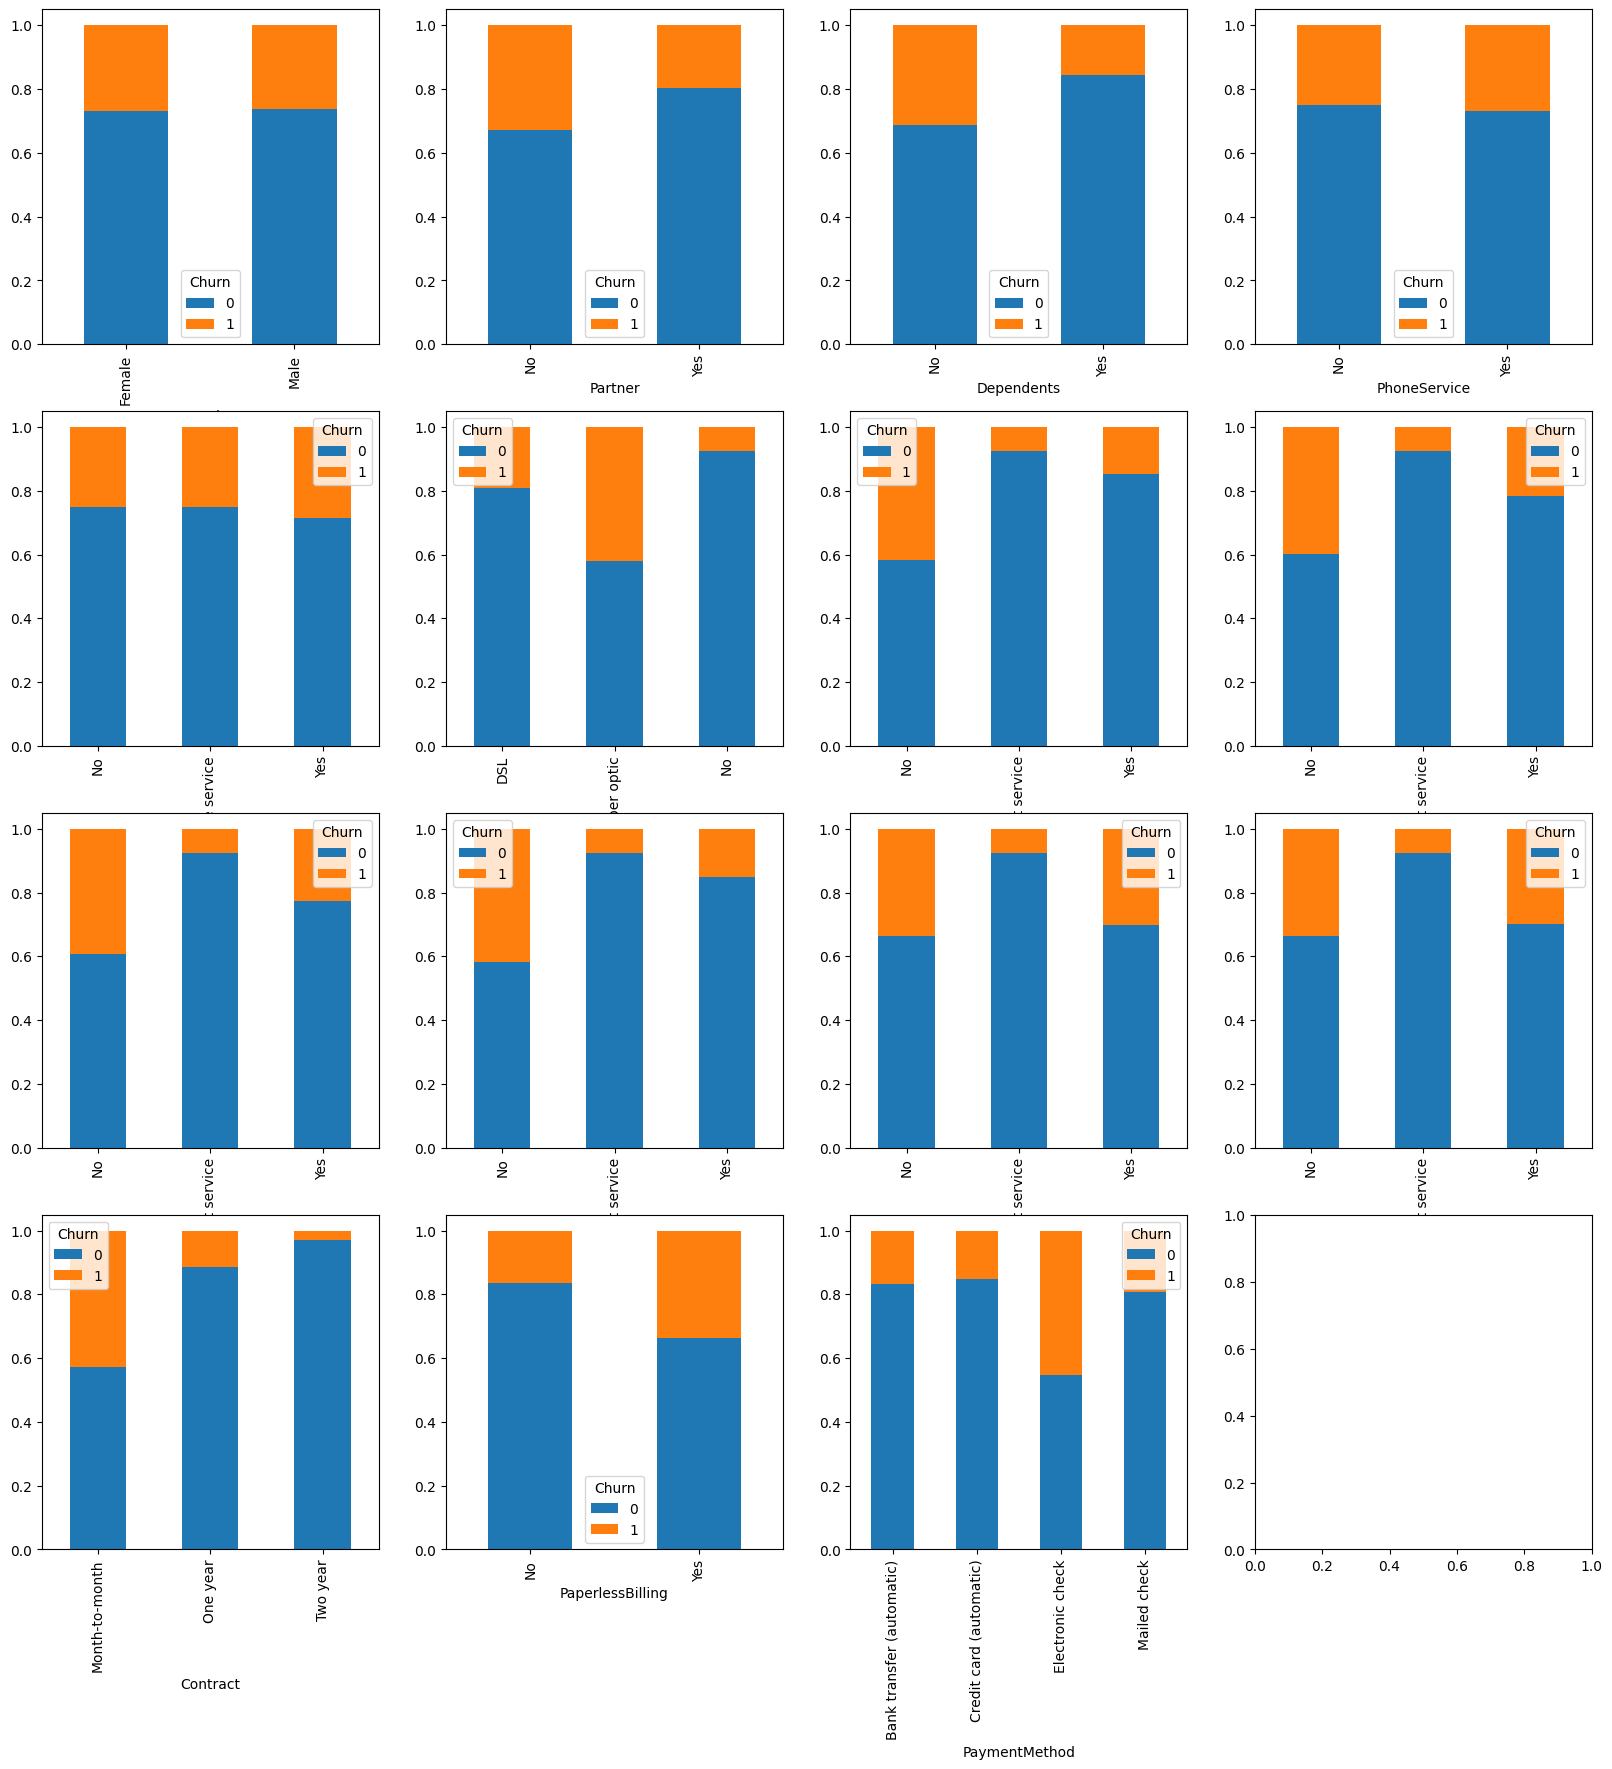

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for col in categorical_cols:
    grouped_data = df.groupby(col)[target].value_counts(normalize=True).unstack().fillna(0)
    grouped_data.plot(kind='bar', stacked=True, ax=axes[categorical_cols.index(col)//4, categorical_cols.index(col)%4])

In [13]:
df.to_csv('data/processed/3_outliers_handled.csv', index=False)